In [1]:
import pandas as pd


def file_to_pandas(file):
    """Read a GESLA data file into a pandas.DataFrame object. Metadata is
    returned as a pandas.Series object.
    Args:
        filename (string): name of the GESLA data file. Do not prepend path.
        return_meta (bool, optional): determines if metadata is returned as
            a second function output. Defaults to True.
    Returns:
        pandas.DataFrame: sea-level values and flags with datetime index.
        pandas.Series: record metadata. This return can be excluded by
            setting return_meta=False.
    """
    with open(file, "r") as f:
        data = pd.read_csv(
            f,
            skiprows=41,
            names=["date", "time", "sea_level", "qc_flag", "use_flag"],
            sep="\s+",
            parse_dates=[[0, 1]],
            index_col=0,
        )
    return data


In [2]:
import numpy as np


def harmfit(invariant, *args):
    # a0, Cn, and Dn are the estimated amplitudes and phases of the constituents
    # wn are the angular frequencies of the consistuents
    # t is the time vector
    # output = mean + sum_k=1^k=Nharm Cn*sin(wn(k)*t) + Dn*cos(wn(k)*t)

    if len(args) == 1:
        args = tuple(args[0])

    t = invariant["timesteps"]
    wn = invariant["wn"]

    in_args = np.array(args[1:])

    a0 = args[0]
    Cn, Dn = np.split(in_args, 2)

    test = np.empty(len(t))
    test.fill(a0)

    for idx, ts in enumerate(t):
        for k in range(len(Cn)):
            test[idx] = test[idx] + Cn[k] * np.sin(wn[k] * ts) + Dn[k] * np.cos(wn[k] * ts)
    return test


In [3]:
#%% import packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import signal

#%% Load data for one year

# Choose which station you want to use and set filename here
filename = "cuxhaven-cux-deu-cmems"
file = filename # Change if your file containing the data is not in the same directory as this Python script.

data_orig = file_to_pandas(file)
#df = pd.DataFrame({'DateTime':data_orig[0], 'Sea Level':data_orig[1],"qc":data_orig[2], "use flag":data_orig[3]})

# 2 OPTIONS FOR STUDENTS:
# 1: JUST SAY CHECK TIME VECTOR AND MISSING DATA OR INCORRECT VALUES
# 2: OR ALSO GIVE THEM THE CODE BELOW, WHICH HANDLES THE INCORRECT OR MISSING DATA

# Where 'use_flag' = 0; don't use data, so 'sea_level' is set to NaN.
data_orig.loc[(data_orig['use_flag'] == 0), 'sea_level'] = np.nan

# Select start and end dates for the year you want to analyse
time_start = "2018-01-01 00:10:00"
time_end = "2018-12-31 23:50:00"
data = data_orig.loc[time_start:time_end]
data = data.dropna() #also drop nan values

ssh = data.sea_level
time = data.index
time = time.to_pydatetime()

#%% Make some first plots
#%% Define the tidal periods you will analyze

#%% Check for Rayleigh criterion

# wn are the input angluar frequencies of tidal constituents

#%% Calculate angular frequencies!

#%% Fit the harmonic function (harmfit)

# Before fitting, define a0, Cn, and Dn for initial estimates

# coefin contains all parameters that have to be optimized
#coefin = [a0_in, Cn_in, Dn_in]

# Use fitting function to optimize the amplitudes and phases of observed water levels
#coefout = ...

#Use optimized amplitudes and phases to make the best fit function
#fitted_water_level = harmfit(coefout, t)

# Determine quality of fit

#Determine amplitudes and phases of all tidal constituents

# Some plotting


In [4]:
std_fig = (10,5)
std_dpi = 200
std_lw = 1

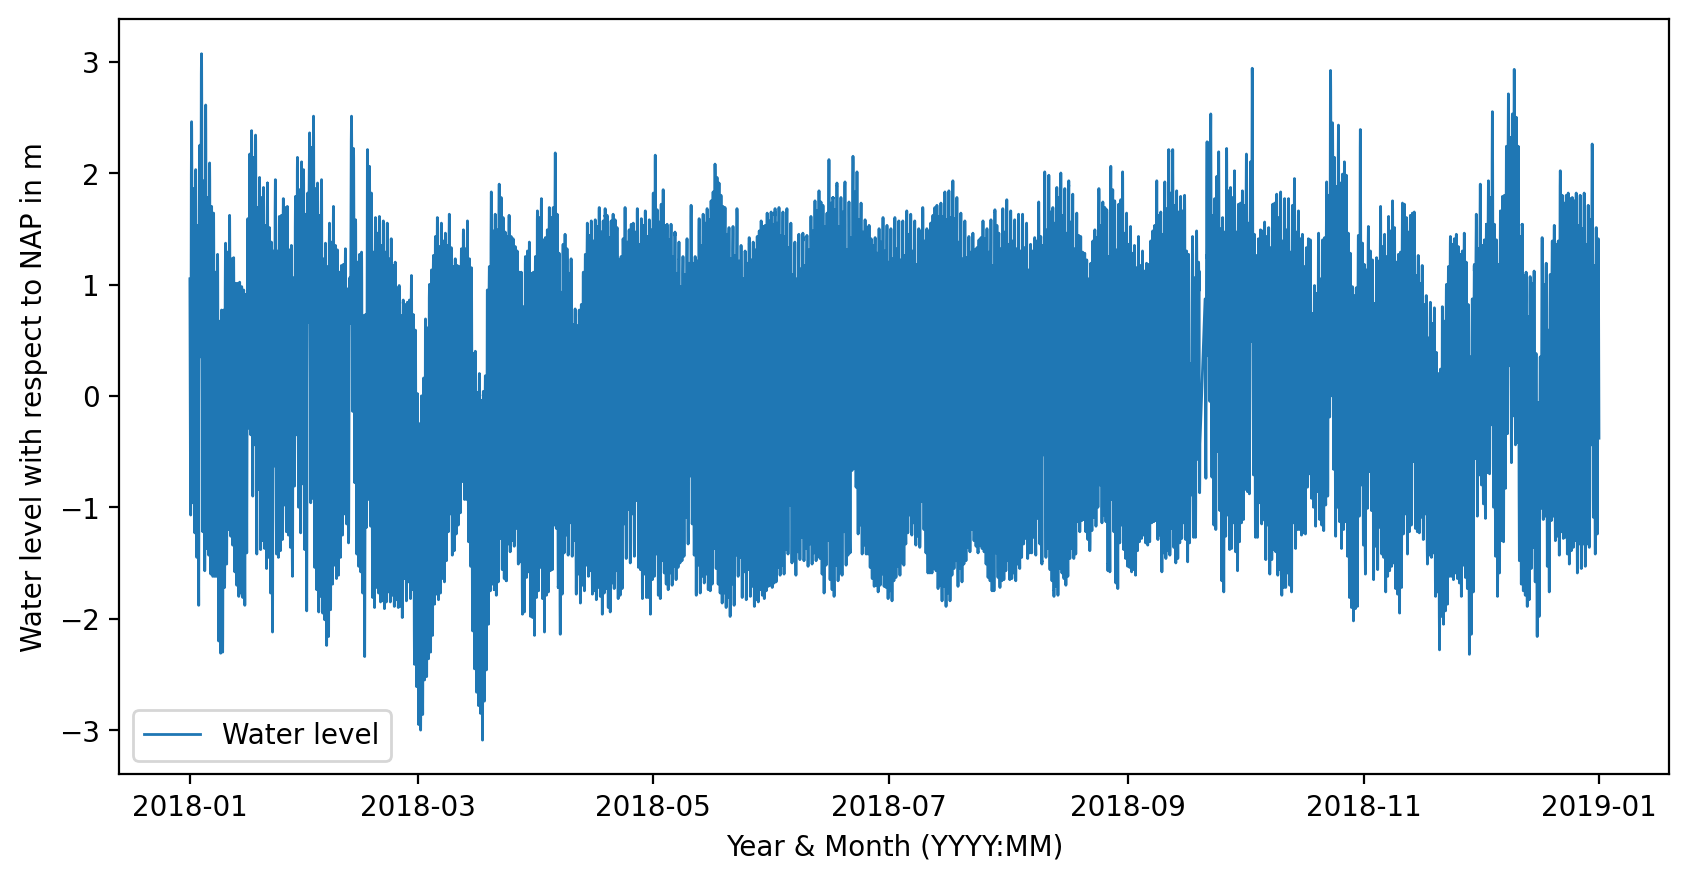

In [5]:

fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)
frame.plot(time,ssh,label='Water level', linewidth=std_lw)
# frame.set_title("Water level of Elbe in year 2018 at Cuxhaven with respect to NAP")
frame.set_xlabel('Year & Month (YYYY:MM)')
frame.set_ylabel('Water level with respect to NAP in m')
frame.legend()
plt.show()

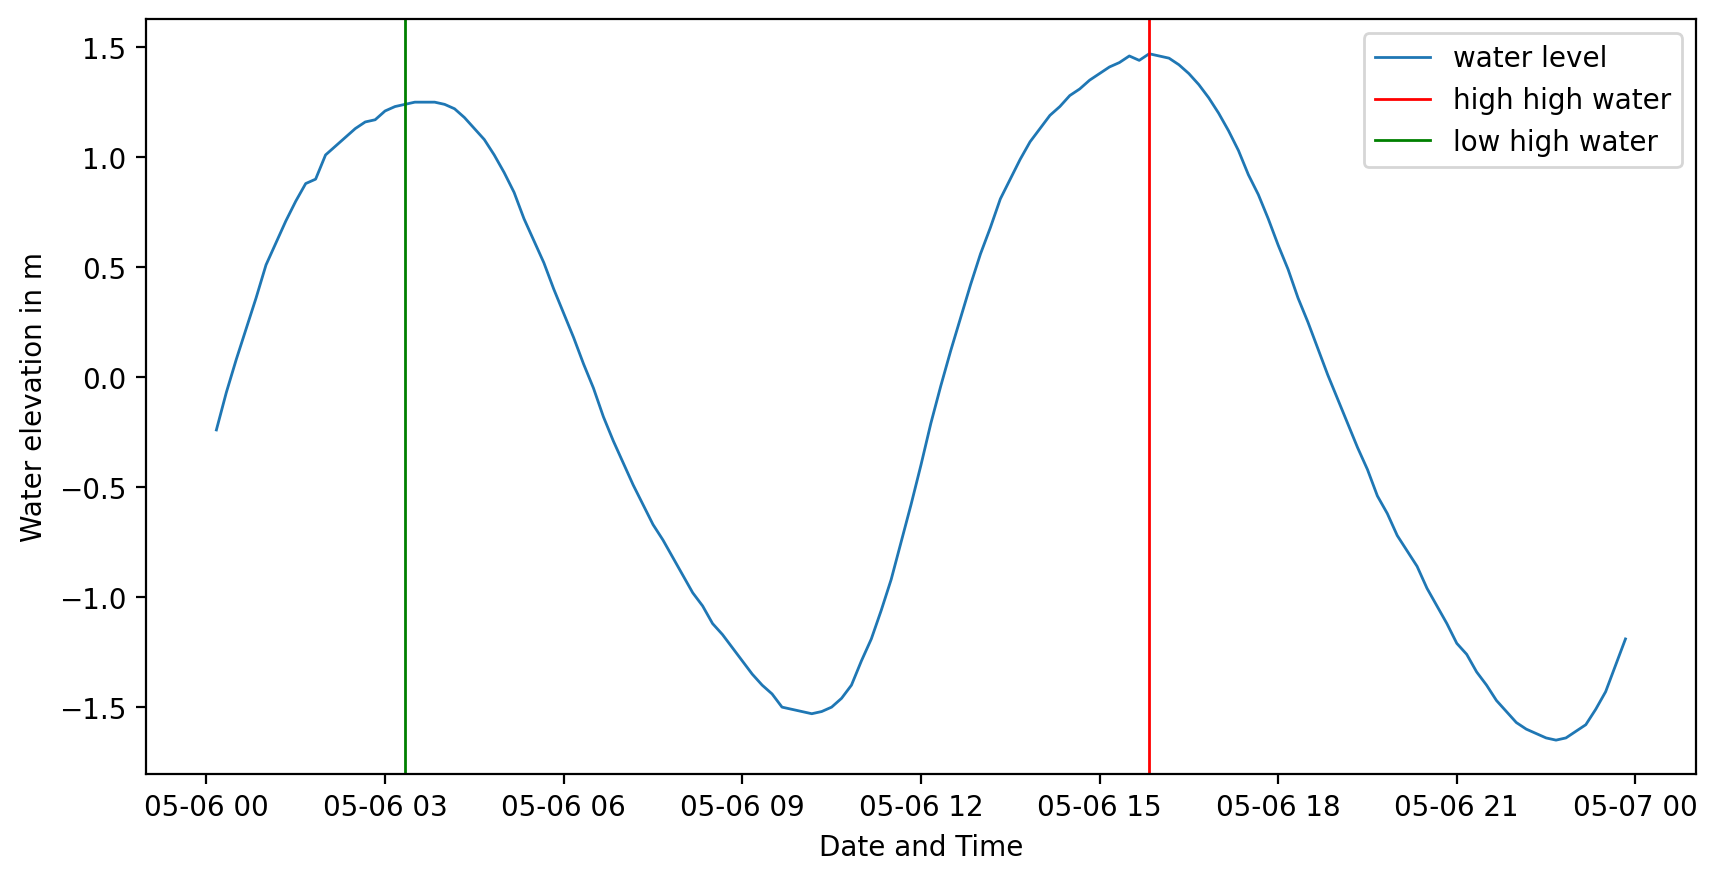

In [6]:
time_start_day = "2018-05-06 00:10:00" #Picking 1 day for 1a
time_end_day = "2018-05-06 23:50:00"
data_1a = data_orig.loc[time_start_day:time_end_day]
data_1a = data_1a.dropna() #also drop nan values

ssh_1a = data_1a.sea_level
time_1a = data_1a.index
time_1a = time_1a.to_pydatetime()


ssh_1a_halved = ssh_1a[:20]
time_1a_halved = time_1a[:20]



timeneeded = (time_1a[ssh_1a == ssh_1a.max()])
timeneeded2 = time_1a_halved[ssh_1a_halved == ssh_1a_halved.max()]


fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)
frame.plot(time_1a,ssh_1a,label='water level', lw=std_lw)
# plt.title('24 Hours water cycle of the Elbe on 6 May 2018 from 00:10 to 23:50')
plt.axvline(timeneeded[0],label='high high water', c='r', lw=std_lw)
plt.axvline(timeneeded2[0],label='low high water', c='g', lw=std_lw)
frame.set_xlabel('Date and Time')
frame.set_ylabel('Water elevation in m')
frame.legend()
plt.show()


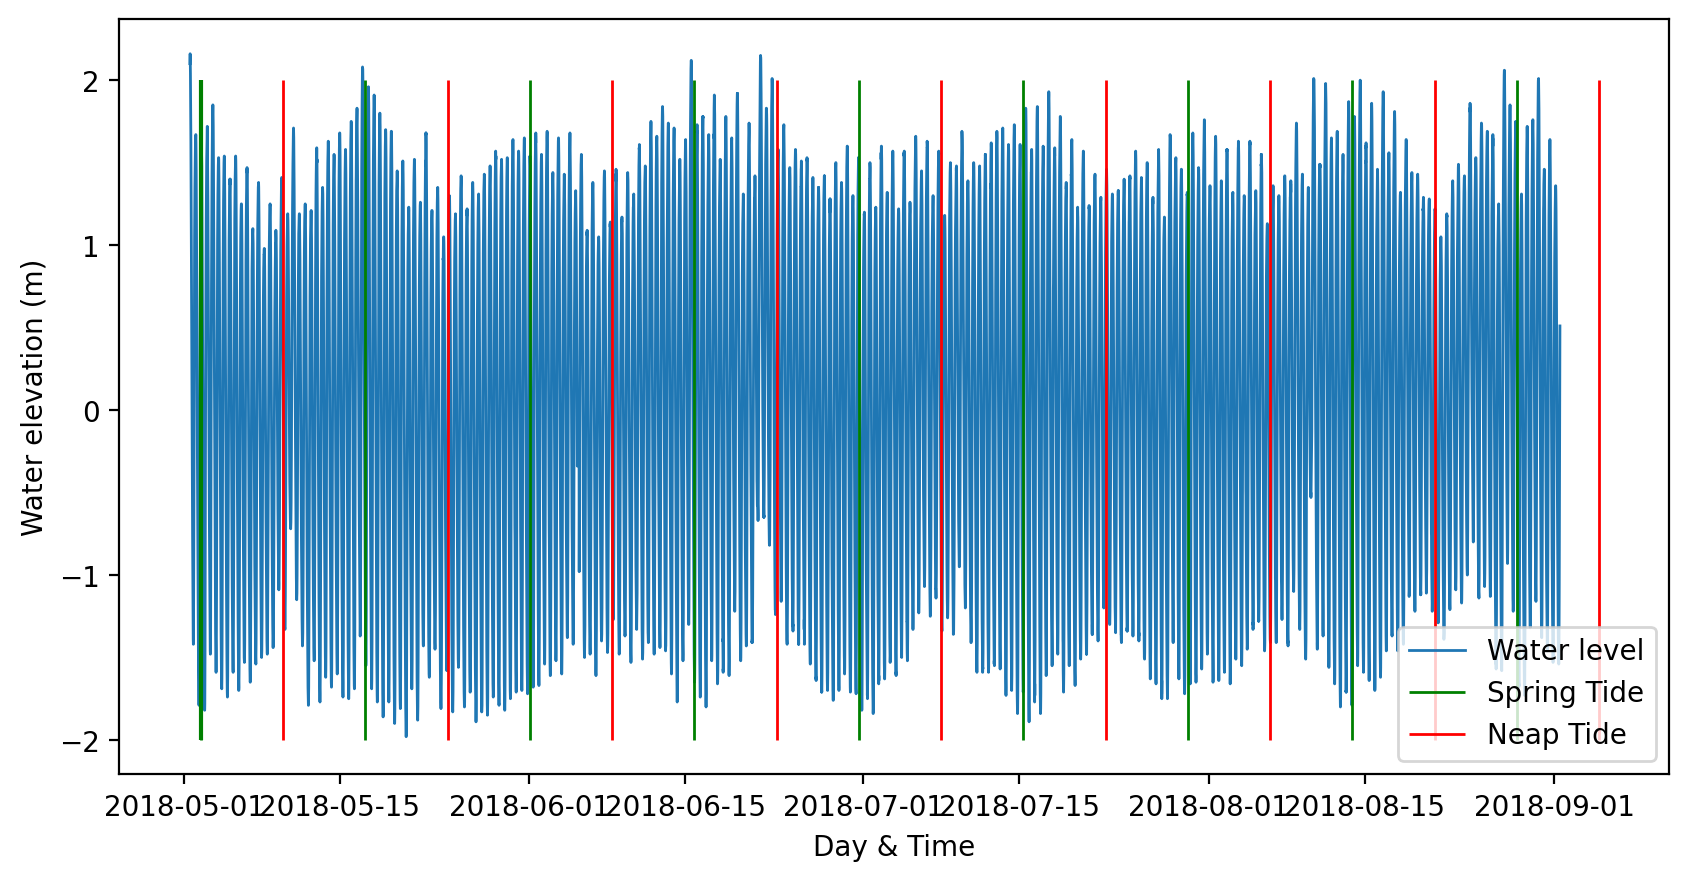

In [54]:
from datetime import timedelta

time_start_day = "2018-05-01 12:40:00"#"2018-09-01 12:40:00" #picking 3 months
time_end_day = "2018-09-01 12:40:00" #"2018-12-31 17:40:00"
data_1a = data_orig.loc[time_start_day:time_end_day]
data_1a = data_1a.dropna() #also drop nan values

ssh_1a = data_1a.sea_level
time_1a = data_1a.index
time_1a = time_1a.to_pydatetime()

start_time = time_1a[0] + timedelta(days=1)
delta = timedelta(hours=354.3670666)
# print(np.arange(1, 1))
# print(np.arange(5, 1) * delta)
N = 9

fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)
frame.plot(time_1a,ssh_1a,label='Water level', lw=std_lw)
plt.vlines(start_time, -2, 2, color="g")
plt.vlines(start_time + np.arange(0, N) * delta, -2, 2, color='g', lw=std_lw, label="Spring Tide")
plt.vlines(start_time + delta / 2 + np.arange(0, N) * delta, -2, 2, color='r', lw=std_lw, label="Neap Tide")
# plt.title('3 Month water cycle of the Elbe 2018')

# plt.axvline(start_time,c='r', lw=std_lw) # +(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24))
# plt.axvline(start_time+0.5*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='g', lw=std_lw)
# plt.axvline(start_time+(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='r', lw=std_lw)
# plt.axvline(start_time+1.5*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='g', lw=std_lw)
# plt.axvline(start_time+2*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='r', lw=std_lw)
# plt.axvline(start_time+2.5*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='g', lw=std_lw)
# plt.axvline(start_time+3*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='r', lw=std_lw)
# plt.axvline(start_time+3.5*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='g', lw=std_lw)
# plt.axvline(start_time+4*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='r', label='Low tide', lw=std_lw)
# plt.axvline(start_time+4.5*(timedelta(days=x)+timedelta(hours=14)+timedelta(minutes=24)),c='g',label='High tide', lw=std_lw)
frame.set_xlabel('Day & Time')
frame.set_ylabel('Water elevation (m)')
frame.legend()
plt.show()

# 1) Basics

262


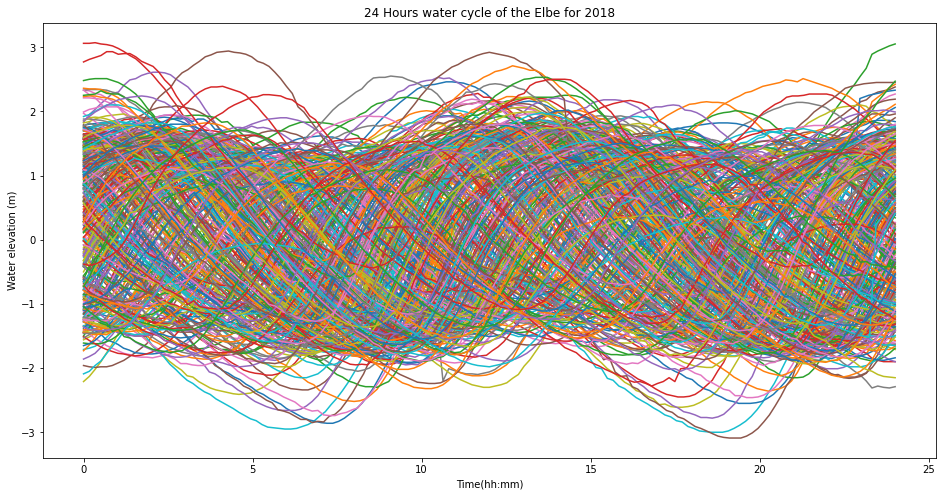

In [8]:
#Here, we plot every day seperately. The Chaos is expected since tides shift
#Also, for every day we make an array of maximum dayly values as well as minimum dayly values.
# Year of 2018 is chosen because that year only misses one day, therefore we have most data there

from datetime import timedelta, datetime #importing pakages


fig = plt.figure(figsize=(16,8)) #Making the subplot
frame = fig.add_subplot(111)
plt.title('24 Hours water cycle of the Elbe for 2018')
frame.set_xlabel('Time(hh:mm)')
frame.set_ylabel('Water elevation (m)')

i="2018-01-01 00:00:01" #Initial conditinos, so 1st day
j="2018-01-01 23:59:59"
data_2 = data_orig.loc[i:j]
data_2 = data_2.dropna() #also drop nan values
ssh_2 = data.sea_level #Getting some initial conditinos
time_2 = data.index #still
time_2 = time_2.to_pydatetime() #still

min_amp = np.array([]) #Creating minimum and maximum arrays
max_amp = np.array([]) #

for k in range(365): #Looping over the whole year of 2018, k is # of days
    data_3 = data_orig.loc[i:j]
    data_3 = data_3.dropna() #also drop nan values
    
    ssh_3 = data_3.sea_level
    time_3 = data_3.index
    time_3 = time_3.to_pydatetime()
    x = np.linspace(0,24,len(time_3)) #instead of having the x-axis 'normal' I make a linspace from 00:00 to 23:59. Works because initial conditinos
    frame.plot(x,ssh_3) 
    max_amp = np.append(max_amp, np.max(ssh_3))
    min_amp = np.append(min_amp, np.min(ssh_3))
    
    if np.isnan(max_amp[k]) == True: #for one day we do not have values, so I wrote this workaway. Looked manually at the data which day it is and worked around. So this code won't work for other years since they miss more than one day
        print(k) 
        dt_string = "21/09/2018 00:00"
        dt_string_2 = "21/09/2018 23:50"
        i = datetime.strptime(dt_string, "%d/%m/%Y %H:%M") #Only if we have a NaN in last loop we skip to this date
        j = datetime.strptime(dt_string_2, "%d/%m/%Y %H:%M") #''
    else:
        i = time_3[0] + timedelta(days=1) #Otherwise here we add one day and start again. 
        j = time_3[-1] + timedelta(days=1)
    
plt.show()

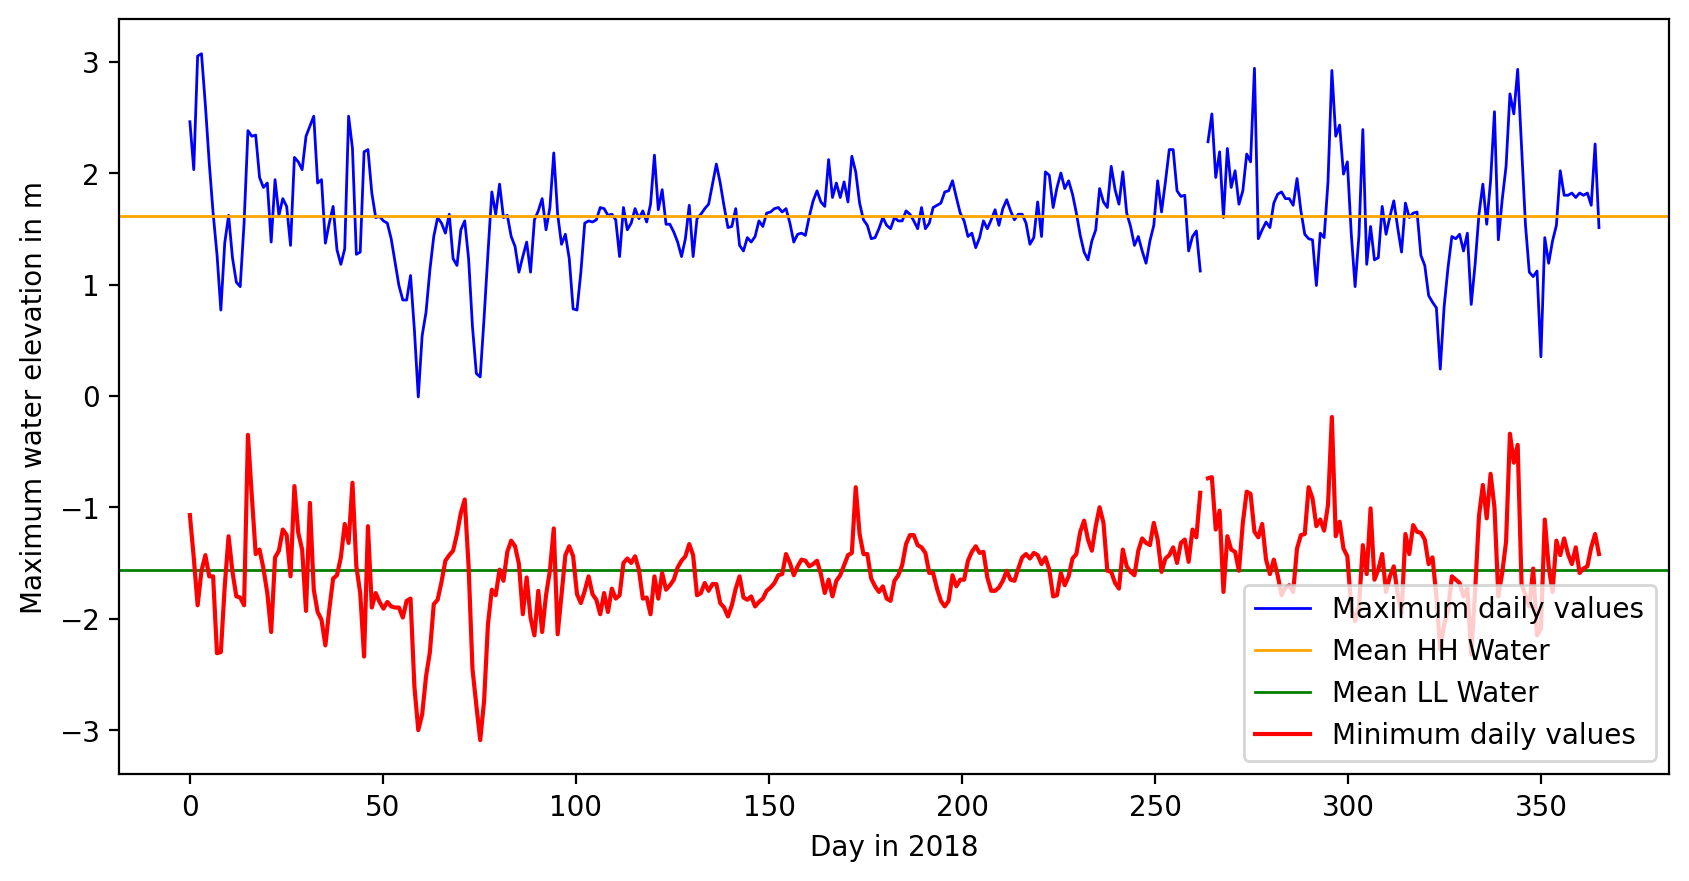

In [9]:
#Plotting the high high values and low low values
#This is for 1b. 
data_orig = file_to_pandas(file)
data_orig.loc[(data_orig['use_flag'] == 0), 'sea_level'] = np.nan

time_start = "2018-01-01 00:10:00" #Use the data for the whole of 2018
time_end = "2018-12-31 23:50:00" #Use the data for the whole of 2018
data_2 = data_orig.loc[time_start:time_end]

data_2 = data_2.dropna() #also drop nan values
  
ssh_2 = data_2.sea_level
time_2 = data_2.index
time_2 = time_2.to_pydatetime()


avg = np.average(ssh_2)
bigger = np.array([])
smaller = np.array([])

for k in range(len(ssh_2)): #For loop to check which values are higher than average and which lower
    if ssh_2[k] > avg:
        bigger = np.append(bigger, time_2[k])
    elif ssh_2[k] < avg:
        smaller = np.append(smaller, time_2[k])
    else:
        None #Use this because if the value is exactly the average it crashesh!!!!

sshpos = np.array([])
sshneg = np.array([])

for val in ssh_2: #lmao I don't think I use this loop
    if val > 0:
        sshpos = np.append(sshpos, val)
    elif val < 0:
        sshneg = np.append(sshneg, val)
    else:
        None

max_amp_2 = max_amp[~np.isnan(max_amp)]
min_amp_2 = min_amp[~np.isnan(min_amp)]
avghht = np.average(max_amp_2)
avgllt = np.average(min_amp_2)


fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)

frame.set_xlabel('Day in 2018')
frame.set_ylabel('Maximum water elevation in m')

# plt.title('Dayly maximum high high water and low low water of Elbe in 2018 (januari 1st till december 31st)')

plt.plot(np.linspace(0,max_amp.size,max_amp.size),max_amp,label='Maximum daily values',c='b', lw=std_lw)
plt.axhline(avghht, c='orange',label='Mean HH Water', lw=std_lw)
plt.axhline(avgllt,c='g',label='Mean LL Water', lw=std_lw)
plt.plot(np.linspace(0, min_amp.size, min_amp.size), min_amp, c='r', label='Minimum daily values')
plt.legend(loc="lower right")

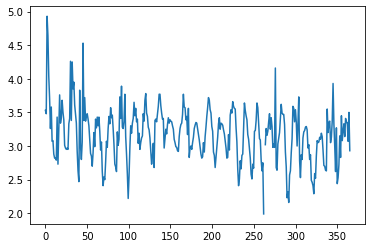

In [10]:
plt.plot(np.linspace(0, min_amp.size, min_amp.size), max_amp-min_amp)

In [11]:
timeB = (bigger.size*600)/(3600*24) #increments of 10 minutes, so divided by 3600*24 to find days

timeS = (smaller.size*600)/(3600*24) #increments of 10 minutes, so divided by 3600*24 to find days
timeTot = ssh_2.size*600/(3600*24)
print('For the year 2018 there was ', np.round(timeTot,3),'days of data recorded of which',np.round(timeB,3),'days the Elbe was above the average and', np.round(timeS,3),'days below')
print('The average water level in the Elbe is ',np.round(avg,3),'m above NAP')
print('Thus, we can safely conclude we have sealevel rise.')
print('Average HW level', np.round(avghht,3),'and for LW level', np.round(avgllt,3))

For the year 2018 there was  361.208 days of data recorded of which 185.312 days the Elbe was above the average and 175.896 days below
The average water level in the Elbe is  0.092 m above NAP
Thus, we can safely conclude we have sealevel rise.
Average HW level 1.613 and for LW level -1.562


# 2) Fitting

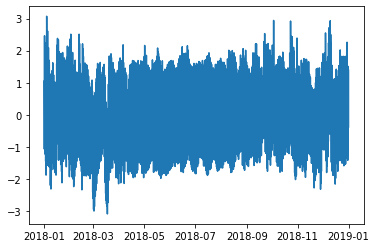

In [12]:
plt.plot(time, ssh)

# Fast Fourier Transform

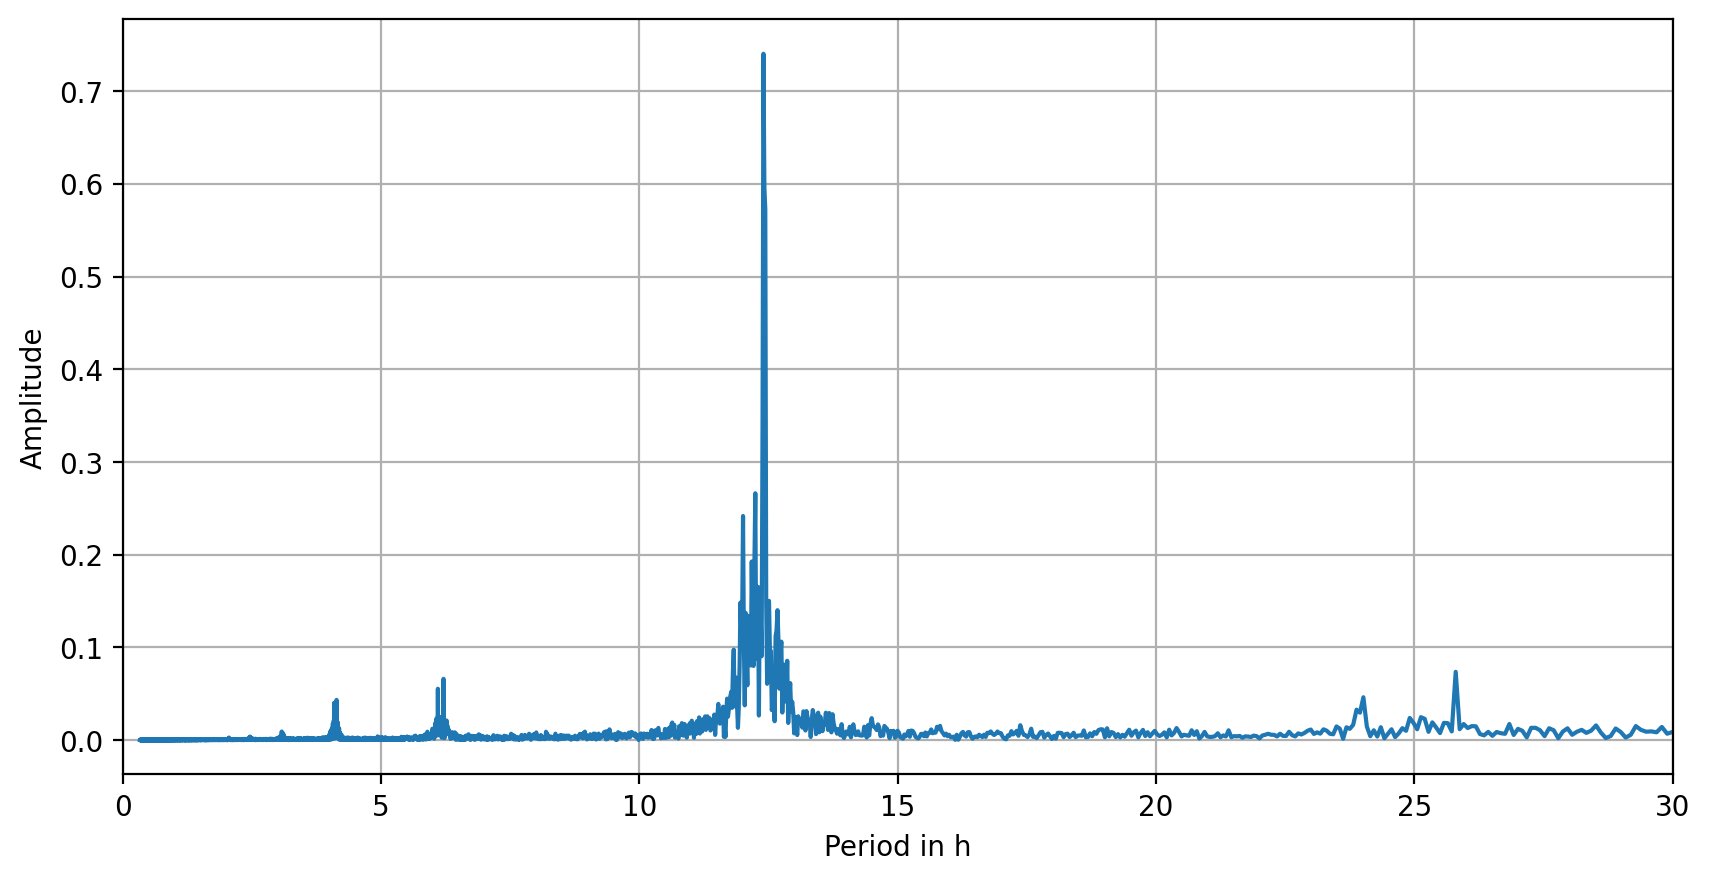

In [13]:
%matplotlib inline
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(time)
# sample spacing
T = 10 * 60 / 3600

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(np.array(ssh))
xf = fftfreq(N, T)[:N//2]


fig = plt.figure(figsize=std_fig, dpi=std_dpi, linewidth=std_lw)
frame = fig.add_subplot(111)
frame.plot(1/xf[1:], 2.0/N * np.abs(yf[0:N//2])[1:])
frame.grid()
plt.ylabel("Amplitude")
plt.xlabel("Period in h")
# plt.yscale("log")
plt.xlim(0, 30)
plt.show()

# Fit

In [14]:
def harmfit(invariant, *args):
    # a0, Cn, and Dn are the estimated amplitudes and phases of the constituents
    # wn are the angular frequencies of the consistuents
    # t is the time vector
    # output = mean + sum_k=1^k=Nharm Cn*sin(wn(k)*t) + Dn*cos(wn(k)*t)

    if len(args) == 1:
        args = tuple(args[0])

    t = invariant["timesteps"]
    wn = invariant["wn"]

    in_args = np.array(args[1:])

    a0 = args[0]
    Cn, Dn = np.split(in_args, 2)

    test = np.empty(len(t))
    test.fill(a0)

    for idx, ts in enumerate(t):
        for k in range(len(Cn)):
            test[idx] = test[idx] + Cn[k] * np.sin(wn[k] * ts) + Dn[k] * np.cos(wn[k] * ts)
    return test



# define relevant periods
# per_dict = {"M4": 6.210300601, "M6": 4.140200401, "M2": 12.4206012, "S2": 12,
#       "N2": 12.65834751, "K2": 11.96723606, "K1": 23.93447213, "O1": 25.81933871}
per_dict = {
    "M2": 12.4206012, "K1": 23.93447213, "M4": 6.210300601, "M6": 4.140200401,
    "S2": 12, "N2": 12.65834751, "K2": 11.96723606, "lambda2": 12.22177348, "O1": 25.81933871,
    "Mm": 661.3111655, "Ssa": 4383.076325, "Sa": 8766.15265, "Msf": 354.3670666, "Mf": 327.8599387
}
per_vals = np.fromiter(per_dict.values(), dtype=float)
# convert to frequency f = 1/T
wn_vals = 2 * np.pi / per_vals
# wn_vals = wn_vals
print(wn_vals)

# convert time to h after beginning of 2018 for fit
rel_time = datetime(2018, 1, 1)
delta_t = (time - rel_time)
delta_t_s = np.zeros(len(delta_t))
for idx, t in enumerate(delta_t):
    delta_t_s[idx] = t.total_seconds()
delta_t_h = delta_t_s / 3600

def tidefit(wn_vals):
    # fit parameters preparation
    a0 = [1]
    Cn, Dn = np.full(len(wn_vals), 1), np.full(len(wn_vals), 1)
    coefin = np.concatenate((a0, Cn, Dn))
    indep = {"timesteps": delta_t_h, "wn": wn_vals}

    # fit
    popt, pcov = optimize.curve_fit(harmfit, indep, ssh, coefin)
    return popt, pcov

popt, pcov = tidefit(wn_vals)

[5.05868050e-01 2.62516143e-01 1.01173610e+00 1.51760415e+00
 5.23598776e-01 4.96366947e-01 5.25032286e-01 5.14097673e-01
 2.43351907e-01 9.50110271e-03 1.43351036e-03 7.16755178e-04
 1.77307258e-02 1.91642362e-02]


# Reduce uncertainty with more fitting parameters

In [15]:
def fit_optimization(delta_t_h):
    per_dict = {
    "M2": 12.4206012, "K1": 23.93447213, "S2": 12, "M4": 6.210300601, "M6": 4.140200401,
    "N2": 12.65834751, "K2": 11.96723606, "lambda2": 12.22177348, "O1": 25.81933871,
    "Mm": 661.3111655, "Ssa": 4383.076325, "Sa": 8766.15265, "Msf": 354.3670666, "Mf": 327.8599387
    }
    per_vals = np.fromiter(per_dict.values(), dtype=float)
    wn_vals = 2 * np.pi / per_vals
    
    new_wn = []
    rms_list = []
    for idx, w in enumerate(wn_vals):
        new_wn.append(w)
        new_wn_arr = np.array(new_wn)
        popt, pcov = tidefit(new_wn_arr)
        
        indep = {"timesteps": delta_t_h, "wn": wn_vals}
        rms = np.sqrt(np.mean((harmfit(indep, *popt) - ssh) ** 2))
        rms_list.append(rms)
        print(rms)
    return np.array(rms_list)
        
    
# rms_arr = fit_optimization(delta_t_h)

0.5326117269074003
0.530582974900287
0.475184537244356
0.4681381117837847
0.4652525940892475
0.44403047361245734
0.4391384519174884
0.43806253588252425
0.4330350110012124
0.432677047760731
0.43141117743829926
0.4189105564133006
0.41793094307730877
0.41294883933500204


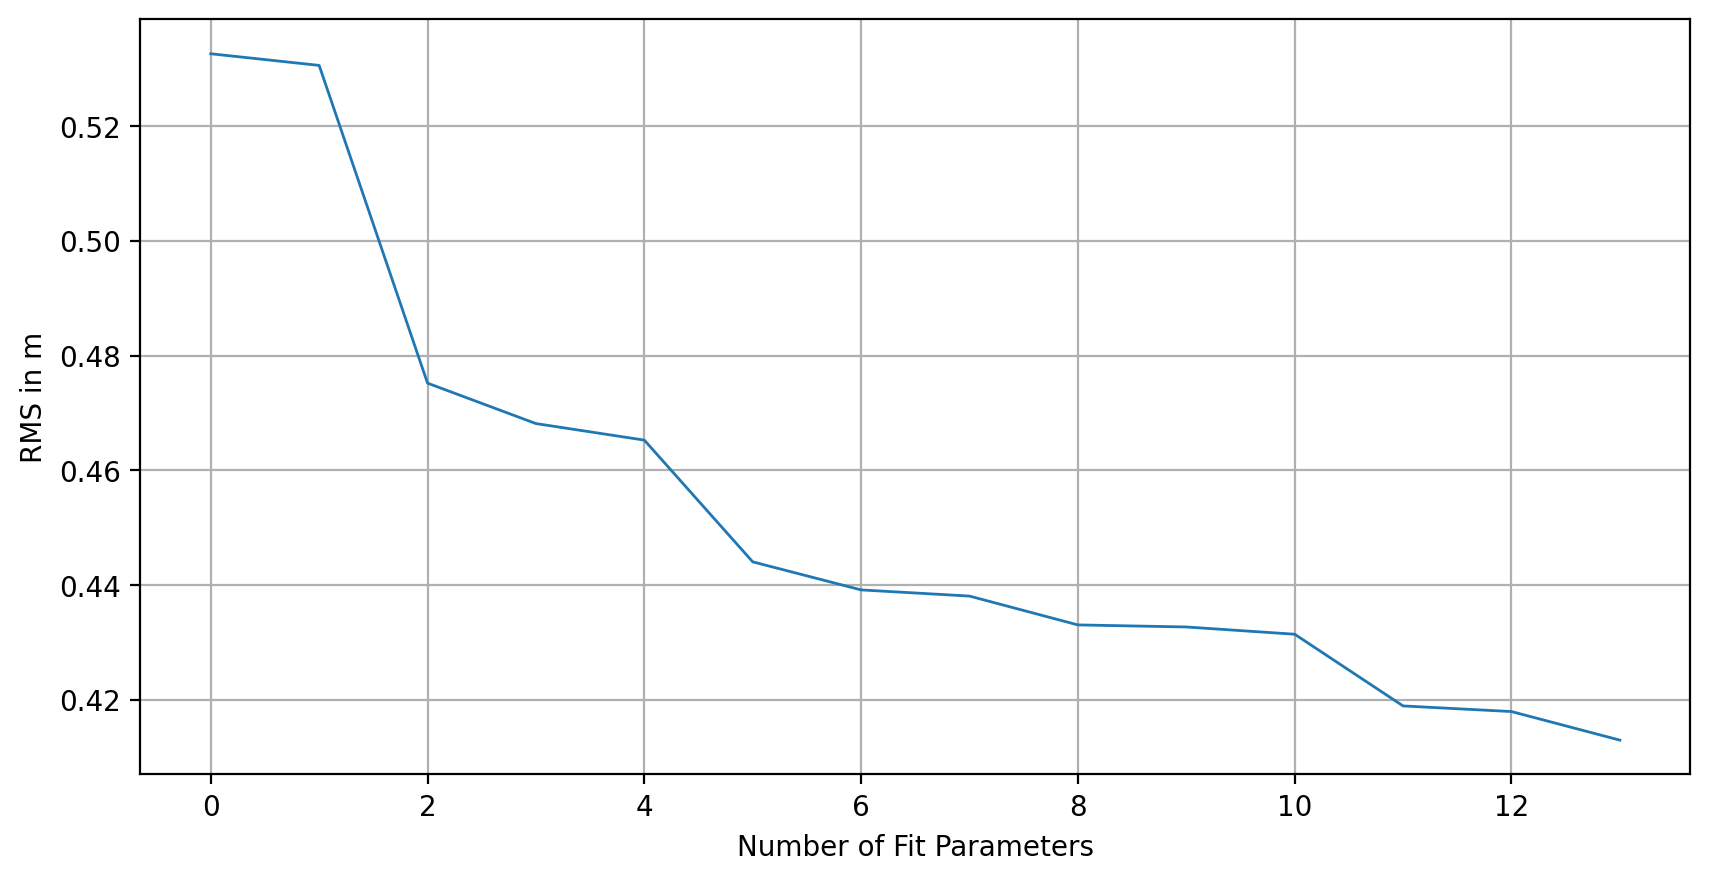

In [17]:
# %matplotlib inline
# fig = plt.figure(figsize=std_fig, dpi=std_dpi)
# frame = fig.add_subplot(111)
# frame.plot(rms_arr, linewidth=std_lw)
# plt.ylabel("RMS in m")
# plt.xlabel("Number of Fit Parameters")
# plt.grid(True)

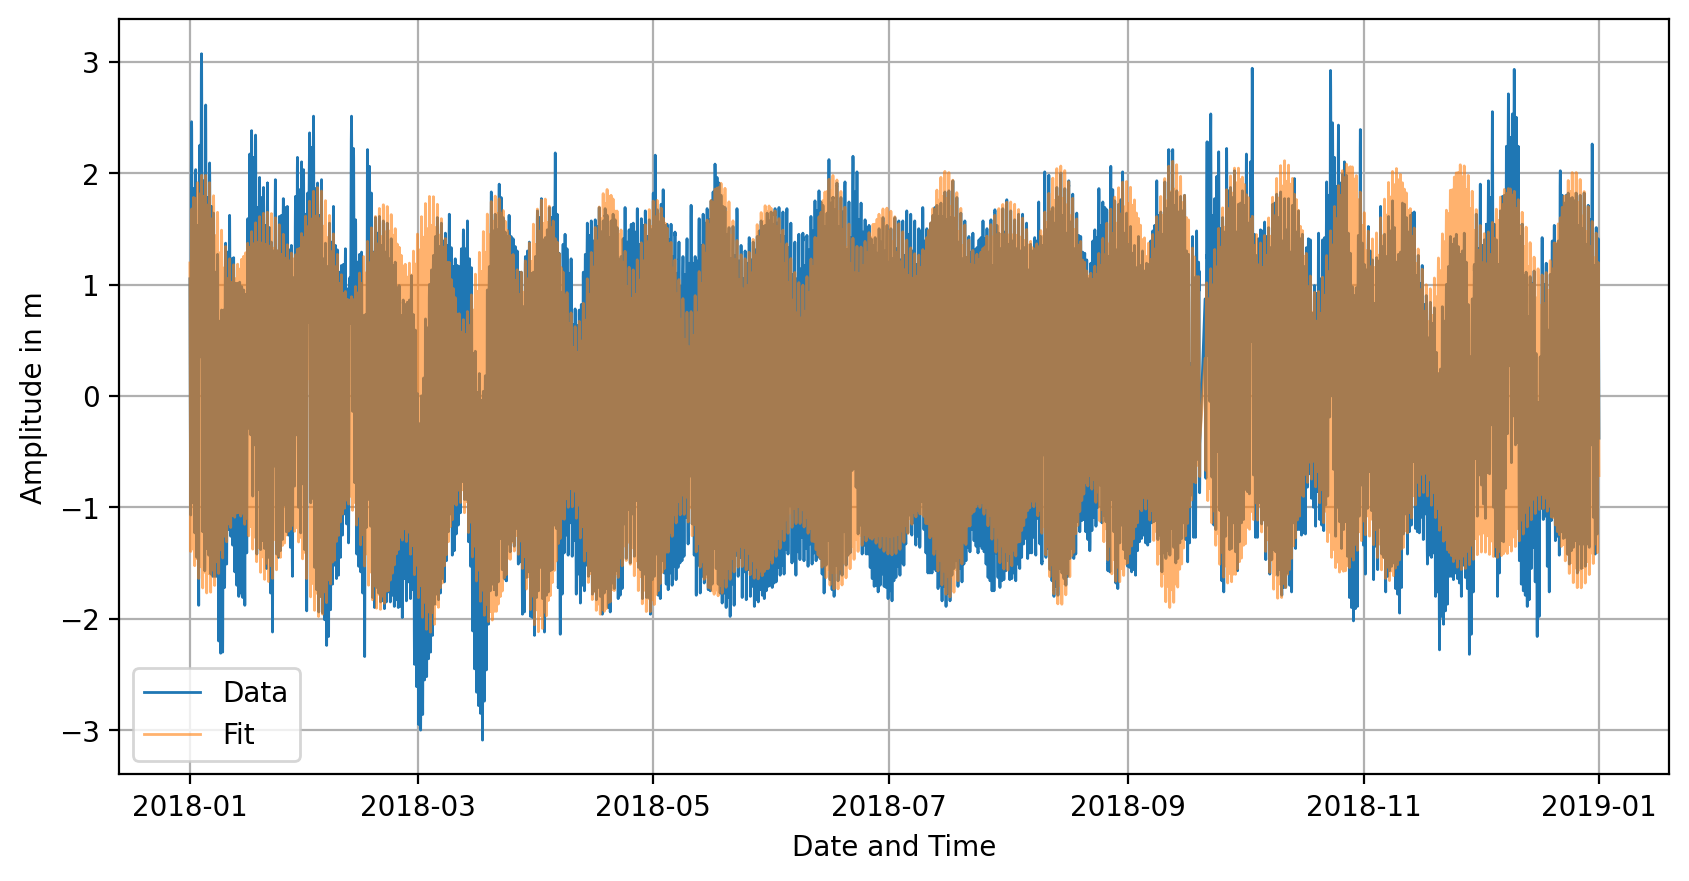

In [131]:
%matplotlib inline
# fit parameters preparation
indep = {"timesteps": delta_t_h, "wn": wn_vals}

fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)
frame.plot(time, ssh, linewidth=std_lw, label="Data")
plt.plot(time, harmfit(indep, *popt), linewidth=std_lw, alpha=0.6, label="Fit")
plt.ylabel("Amplitude in m")
plt.xlabel("Date and Time")
plt.grid(True)
plt.legend()

Text(0.5, 1.0, 'Bad Fit')

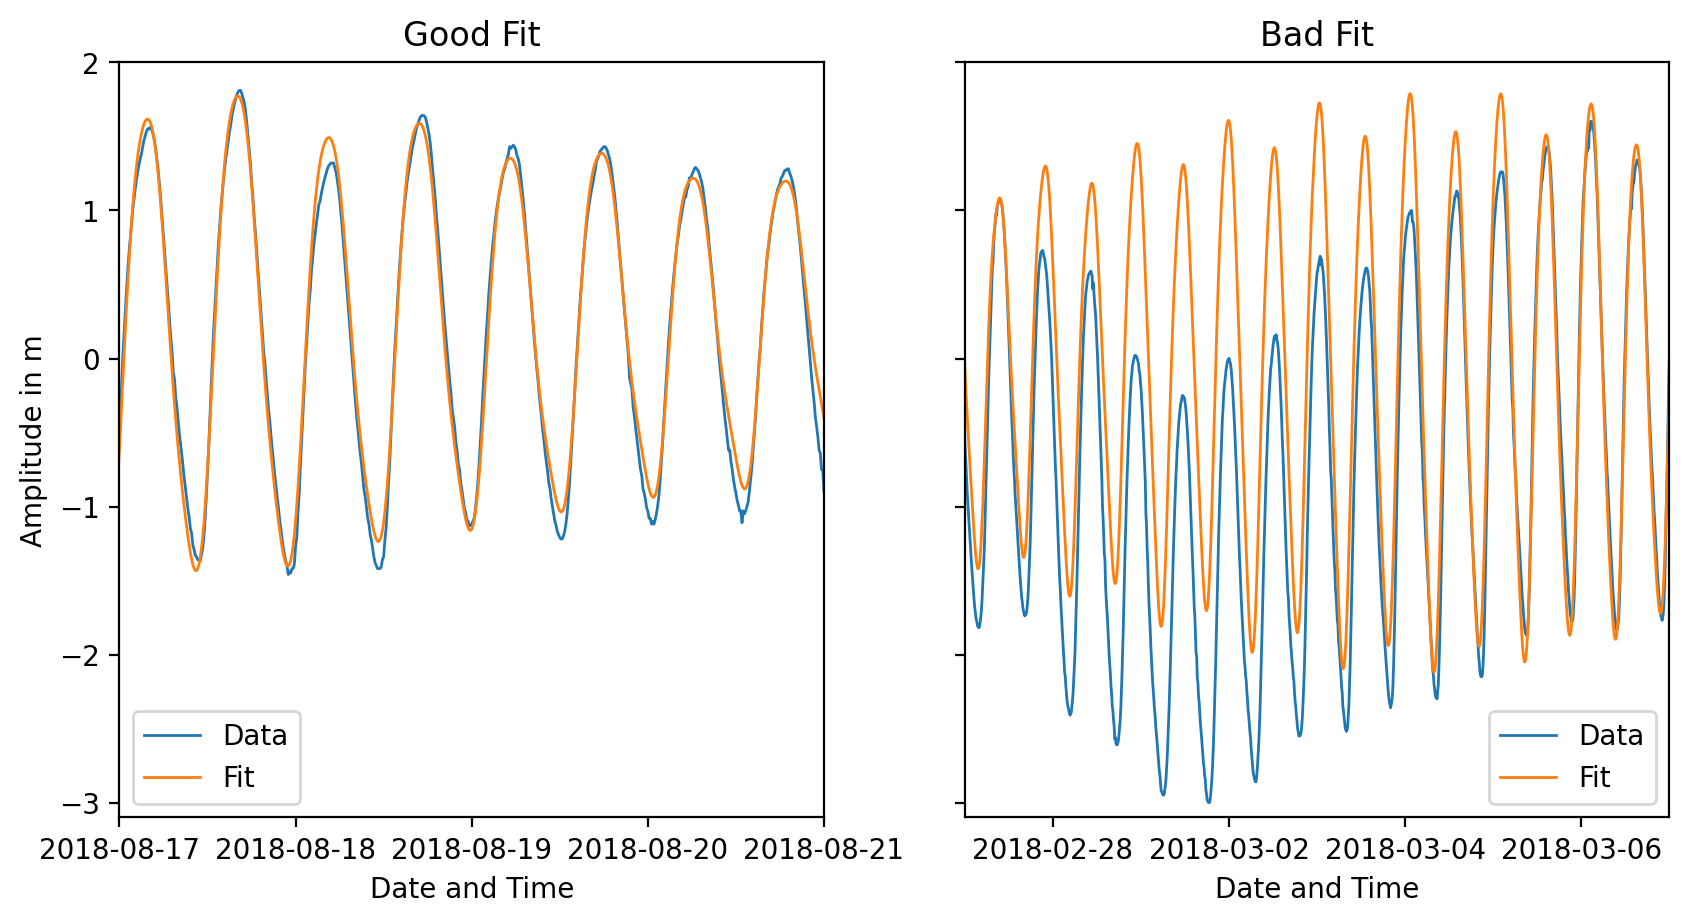

In [101]:
%matplotlib inline
fig, frame = plt.subplots(1, 2, figsize=std_fig, dpi=std_dpi, sharey=True)
# frame = fig.add_subplot(111)
frame[0].plot(time, ssh, linewidth=std_lw, label="Data")
frame[0].plot(time, harmfit(indep, *popt), linewidth=std_lw, label="Fit")
frame[0].set_ylabel("Amplitude in m")
frame[0].set_xlabel("Date and Time")
frame[0].grid(False)
frame[0].set_xlim(datetime(2018, 8, 17), datetime(2018, 8, 21))
frame[0].set_ylim(-3.1, 2)
frame[0].legend()
frame[0].set_xticks(frame[0].get_xticks()[::2])
frame[0].set_title("Good Fit")

# bad fit
frame[1].plot(time, ssh, linewidth=std_lw, label="Data")
frame[1].plot(time, harmfit(indep, *popt), linewidth=std_lw, label="Fit")
frame[1].grid(False)
frame[1].set_xlim(datetime(2018, 2, 27), datetime(2018, 3, 7))
frame[1].legend()
frame[1].set_xticks(frame[1].get_xticks()[1::2])
frame[1].set_xlabel("Date and Time")
frame[1].set_title("Bad Fit")

Text(0.5, 1.0, 'Difference Data to Fit')

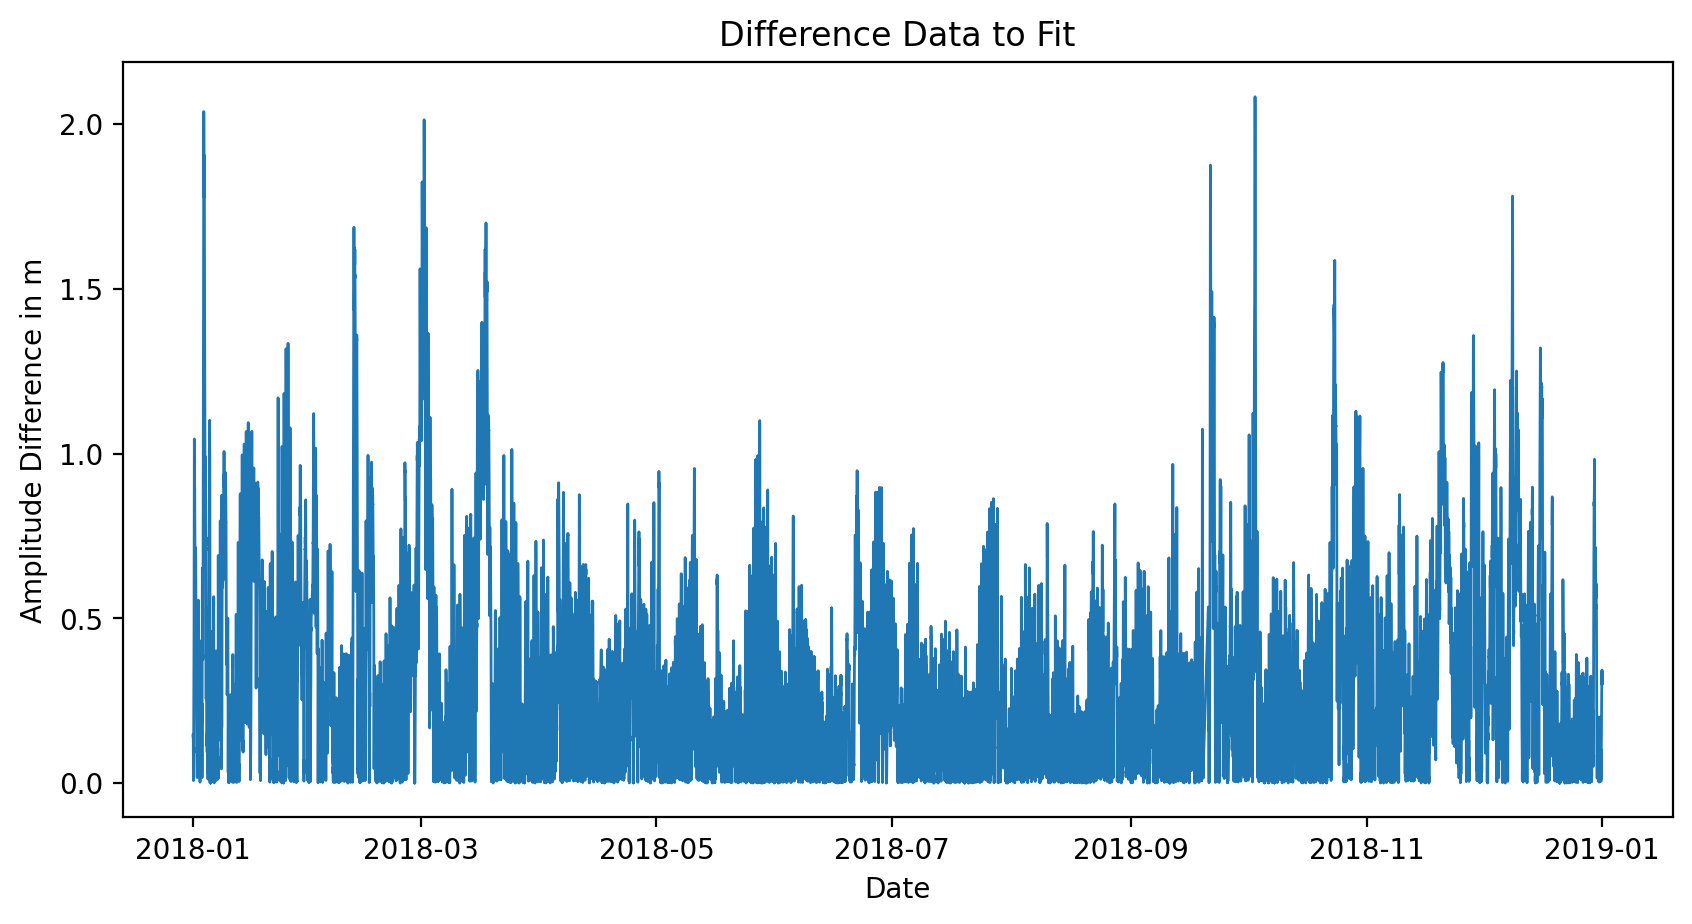

In [104]:
%matplotlib inline
fig = plt.figure(figsize=std_fig, dpi=std_dpi)
frame = fig.add_subplot(111)
plt.plot(time, abs(harmfit(indep, *popt) - ssh), linewidth=std_lw)
plt.ylabel("Amplitude Difference in m")
plt.xlabel("Date")
plt.title("Difference Data to Fit")

# Fit Parameters table

In [106]:
# standard deviation error list
perr = np.sqrt(np.diag(pcov))

constituents_list = list(per_dict.keys())
a0 = popt[0]
u_a0 = perr[0]
print(u_a0)
Cn, Dn = np.split(popt[1:], 2)
u_Cn, u_Dn = np.split(perr[1:], 2)


amplitude = np.sqrt(Cn ** 2 + Dn ** 2)
u_amplitude = 1 / amplitude * np.sqrt((Cn * u_Cn)**2 + (Dn * u_Dn)**2)
phases = np.arctan2(Cn, Dn)
u_phases = np.sqrt((Dn*u_Cn/(Cn**2 + Dn**2))**2 + (Cn*u_Dn/(Cn**2+Dn**2))**2)
rms = np.sqrt(np.mean((harmfit(indep, *popt) - ssh) ** 2))

print("a0 = ", a0)
print("RMS = ", rms)
fit_df = pd.DataFrame({"Constituents": constituents_list, "Amplitude": amplitude, "Phases": phases})
fit_df

0.001812413636427748
a0 =  0.09197305649637078
RMS =  0.4129488393350051


,Constituents,Amplitude,Phases
0,M2,1.373164,-0.784589
1,K1,0.064383,0.658362
2,M4,0.115182,2.743362
3,M6,0.073172,-0.444361
4,S2,0.335179,0.914361
5,N2,0.196421,-1.364509
6,K2,0.092831,-2.318160
7,lambda2,0.043511,2.860884
8,O1,0.093716,-2.358208
9,Mm,0.027671,1.982821


# Exercise 3

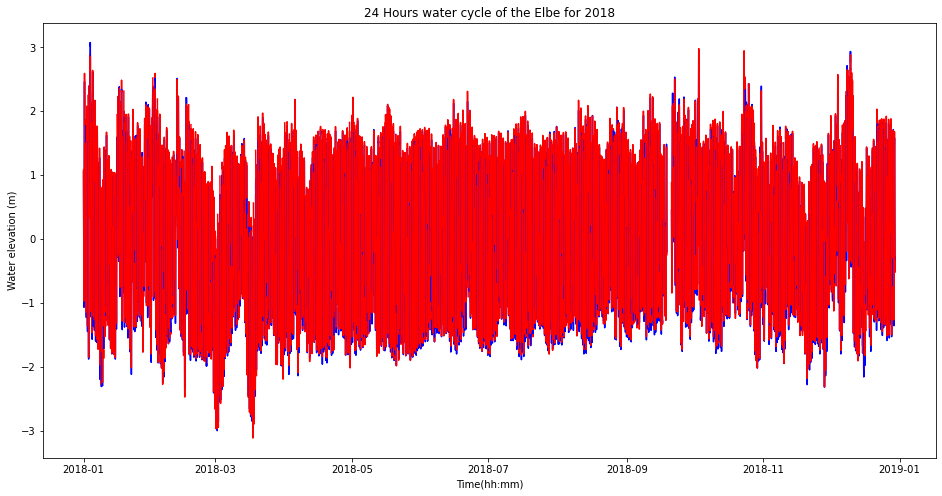

In [27]:
i=datetime(2018,1,1,0,1,0) #Initial conditinos, so 1st day
j=datetime(2018,1,2,1,0,0)

fig = plt.figure(figsize=(16,8)) #Making the subplot
frame = fig.add_subplot(111)
plt.title('24 Hours water cycle of the Elbe for 2018')
frame.set_xlabel('Time(hh:mm)')
frame.set_ylabel('Water elevation (m)')



per_dict = {
    "D2": 12.4166666, "D1": 25, "D4": 6.208333, "M6": 3.1041665,
}

per_vals = np.fromiter(per_dict.values(), dtype=float)
wn_vals = 2 * np.pi / per_vals






for k in range(261): 
    
    data_3 = data_orig.loc[i:j]
    data_3 = data_3.dropna() 
    
    ssh_3 = data_3.sea_level
    time_3 = data_3.index
    time_3 = time_3.to_pydatetime()
    
    def tidefit(wn_vals, time2, j, ssh1):
    # convert time to h after beginning of 2018 for fit
        rel_time = j
        delta_t = (time2 - rel_time)
        delta_t_s = np.zeros(len(delta_t))
        for idx, t in enumerate(delta_t):
            delta_t_s[idx] = t.total_seconds()
        delta_t_h = delta_t_s / 3600

        # fit parameters preparation
        a0 = [1]
        Cn, Dn = np.full(len(wn_vals), 1), np.full(len(wn_vals), 1)
        coefin = np.concatenate((a0, Cn, Dn))
        indep = {"timesteps": delta_t_h, "wn": wn_vals}

        # fit
        popt, pcov = optimize.curve_fit(harmfit, indep, ssh1, coefin)
        return popt, pcov
    

    
    frame.plot(time_3,ssh_3, c='b')
    
    
    max_amp = np.append(max_amp, np.max(ssh_3))
    min_amp = np.append(min_amp, np.min(ssh_3))
    

    
   
    popt2, pcov2 = tidefit(wn_vals, time_3,j ,ssh_3)
    rel_time = j
    delta_t = (time_3 - j)
    delta_t_s = np.zeros(len(delta_t))
    
    for idx, t in enumerate(delta_t):
        delta_t_s[idx] = t.total_seconds()
    delta_t_h = delta_t_s / 3600
    
    indep = {"timesteps": delta_t_h, "wn": wn_vals}
    
    frame.plot(time_3, harmfit(indep, *popt2), c='r')
    
    
    i = time_3[0] + timedelta(days=1) #Otherwise here we add one day and start again. 
    j = time_3[-1] + timedelta(days=1)
        
        
i2=datetime(2018,9,21,0,1,0) #Initial conditinos, so 1st day
j2=datetime(2018,9,22,1,0,0)



for k in range(100): 
    
    data_3_2 = data_orig.loc[i2:j2]
    data_3_2 = data_3_2.dropna() 
    
    ssh_3_2 = data_3_2.sea_level
    time_3_2 = data_3_2.index
    time_3_2 = time_3_2.to_pydatetime()
    
    def tidefit(wn_vals, time2, j, ssh1):
    # convert time to h after beginning of 2018 for fit
        rel_time = j
        delta_t = (time2 - rel_time)
        delta_t_s = np.zeros(len(delta_t))
        for idx, t in enumerate(delta_t):
            delta_t_s[idx] = t.total_seconds()
        delta_t_h = delta_t_s / 3600

        # fit parameters preparation
        a0 = [1]
        Cn, Dn = np.full(len(wn_vals), 1), np.full(len(wn_vals), 1)
        coefin = np.concatenate((a0, Cn, Dn))
        indep = {"timesteps": delta_t_h, "wn": wn_vals}

        # fit
        popt, pcov = optimize.curve_fit(harmfit, indep, ssh1, coefin)
        return popt, pcov
    

    
    frame.plot(time_3_2,ssh_3_2, c='b')
    
    

    

    
   
    popt2, pcov2 = tidefit(wn_vals, time_3_2,j2 ,ssh_3_2)
    rel_time = j2
    delta_t = (time_3_2 - j2)
    delta_t_s = np.zeros(len(delta_t))
    
    for idx, t in enumerate(delta_t):
        delta_t_s[idx] = t.total_seconds()
    delta_t_h = delta_t_s / 3600
    
    indep = {"timesteps": delta_t_h, "wn": wn_vals}
    
    frame.plot(time_3_2, harmfit(indep, *popt2), c='r')
    

    
    
    i2 = time_3_2[0] + timedelta(days=1) #Otherwise here we add one day and start again. 
    j2 = time_3_2[-1] + timedelta(days=1)
    
    

    
    
plt.show()

In [132]:
totRMS = np.array([])
totMean = np.array([])
D2Amp = np.array([])
D1Amp = np.array([])
D4Amp = np.array([])
D6Amp = np.array([])

i=datetime(2018,1,1,0,1,0) #Initial conditinos, so 1st day
j=datetime(2018,1,2,1,1,0)
i2=datetime(2018,9,21,0,1,0) #Initial conditinos, so 1st day
j2=datetime(2018,9,22,1,1,0)
    
for t2 in range(12):
    





    per_dict = {
    "D2": 12.4166666, "D1": 25, "D4": 6.208333, "M6": 3.1041665,
    }

    per_vals = np.fromiter(per_dict.values(), dtype=float)
    wn_vals = 2 * np.pi / per_vals

   


    rmstot = np.array([])

    AmpTot = np.array([])
    mean0 = np.array([])
    for k in range(261): 
    
        data_3 = data_orig.loc[i:j]
        data_3 = data_3.dropna() 
    
        ssh_3 = data_3.sea_level
        time_3 = data_3.index
        time_3 = time_3.to_pydatetime()
        def tidefit(wn_vals, time2, j, ssh1):
    # convert time to h after beginning of 2018 for fit
            rel_time = j
            delta_t = (time2 - rel_time)
            delta_t_s = np.zeros(len(delta_t))
            for idx, t in enumerate(delta_t):
                delta_t_s[idx] = t.total_seconds()
            delta_t_h = delta_t_s / 3600

        # fit parameters preparation
            a0 = [1]
            Cn, Dn = np.full(len(wn_vals), 1), np.full(len(wn_vals), 1)
            coefin = np.concatenate((a0, Cn, Dn))
            indep = {"timesteps": delta_t_h, "wn": wn_vals}

        # fit
            popt, pcov = optimize.curve_fit(harmfit, indep, ssh1, coefin)
            return popt, pcov
    

    
    
    
    
    
    

    
   
        popt2, pcov2 = tidefit(wn_vals, time_3,j ,ssh_3)
        rel_time = j
        delta_t = (time_3 - j)
        delta_t_s = np.zeros(len(delta_t))
    
        a0_2 = popt2[0]
        Cn_2, Dn_2 = np.split(popt2[1:], 2)
        amplitude = np.sqrt(Cn_2**2 + Dn_2**2)  
        AmpTot = np.append(AmpTot, amplitude)
        mean0 = np.append(mean0, a0_2)
        
    
        for idx, t in enumerate(delta_t):
            delta_t_s[idx] = t.total_seconds()
        delta_t_h = delta_t_s / 3600
    
        indep = {"timesteps": delta_t_h, "wn": wn_vals}
        rmstot = np.append(rmstot, np.sqrt(np.mean((harmfit(indep, *popt2)-ssh_3)**2)))
    
    
    
        i = time_3[0] + timedelta(days=1) #Otherwise here we add one day and start again. 
        j = time_3[-1] + timedelta(days=1)
    
#     rmstot = np.append(rmstot, rms(indep,ssh_3))
        
        
    



    for k in range(100): 
    
        data_3_2 = data_orig.loc[i2:j2]
        data_3_2 = data_3_2.dropna() 
    
        ssh_3_2 = data_3_2.sea_level
        time_3_2 = data_3_2.index
        time_3_2 = time_3_2.to_pydatetime()
    
    
    
        def tidefit(wn_vals, time2, j, ssh1):
    # coert time to h after beginning of 2018 for fit
            rel_time = j
            delta_t = (time2 - rel_time)
            delta_t_s = np.zeros(len(delta_t))
            for idx, t in enumerate(delta_t):
                delta_t_s[idx] = t.total_seconds()
            delta_t_h = delta_t_s / 3600

        # fit parameters preparation
            a0 = [1]
            Cn, Dn = np.full(len(wn_vals), 1), np.full(len(wn_vals), 1)
            coefin = np.concatenate((a0, Cn, Dn))
            indep = {"timesteps": delta_t_h, "wn": wn_vals}

        # fit
            popt, pcov = optimize.curve_fit(harmfit, indep, ssh1, coefin)
            return popt, pcov
    

    
   
        popt2, pcov2 = tidefit(wn_vals, time_3_2,j2 ,ssh_3_2)
        a0_2 = popt2[0]
        Cn_2, Dn_2 = np.split(popt2[1:], 2)
        amplitude = np.sqrt(Cn_2**2 + Dn_2**2)  
        AmpTot = np.append(AmpTot, amplitude)
        mean0 = np.append(mean0, a0_2)
        rel_time = j2
        delta_t = (time_3_2 - j2)
        delta_t_s = np.zeros(len(delta_t))
        for idx, t in enumerate(delta_t):
            delta_t_s[idx] = t.total_seconds()
        delta_t_h = delta_t_s / 3600
    
        indep = {"timesteps": delta_t_h, "wn": wn_vals}
        rmstot = np.append(rmstot, np.sqrt(np.mean((harmfit(indep, *popt2)-ssh_3_2)**2)))

        i2 = time_3_2[0] + timedelta(days=1) #Otherwise here we add one day and start again. 
        j2 = time_3_2[-1] + timedelta(days=1)
        
    #rmstot = np.append(rmstot, rms(indep,ssh_3_2))
    totMean = np.append(totMean, mean0)
    D2Amp = np.append(D2Amp, AmpTot[::4])
    D1Amp = np.append(D1Amp, AmpTot[1::4])
    D4Amp = np.append(D4Amp, AmpTot[2::4])
    D6Amp = np.append(D6Amp, AmpTot[3::4])
    totRMS = np.append(totRMS,rmstot)
    
    i=datetime(2018,1,1,0,1,0) #Initial conditinos, so 1st day
    j=datetime(2018,1,2,1,1,0)
    i2=datetime(2018,9,21,0,1,0) #Initial conditinos, so 1st day
    j2=datetime(2018,9,22,1,1,0)
    
    i = i + (t2+1)*timedelta(hours=2)
    j = j + (t2+1)*timedelta(hours=2)
    i2 = i2 + (t2+1)*timedelta(hours=2)
    j2 = j2 + (t2+1)*timedelta(hours=2)
    print(t2,D2Amp.size)
    print(j)

    
    


0 358
2018-01-02 03:01:00
1 716
2018-01-02 05:01:00
2 1074
2018-01-02 07:01:00
3 1432
2018-01-02 09:01:00
4 1790
2018-01-02 11:01:00
5 2148
2018-01-02 13:01:00
6 2506
2018-01-02 15:01:00
7 2864
2018-01-02 17:01:00
8 3222
2018-01-02 19:01:00
9 3580
2018-01-02 21:01:00
10 3938
2018-01-02 23:01:00
11 4296
2018-01-03 01:01:00


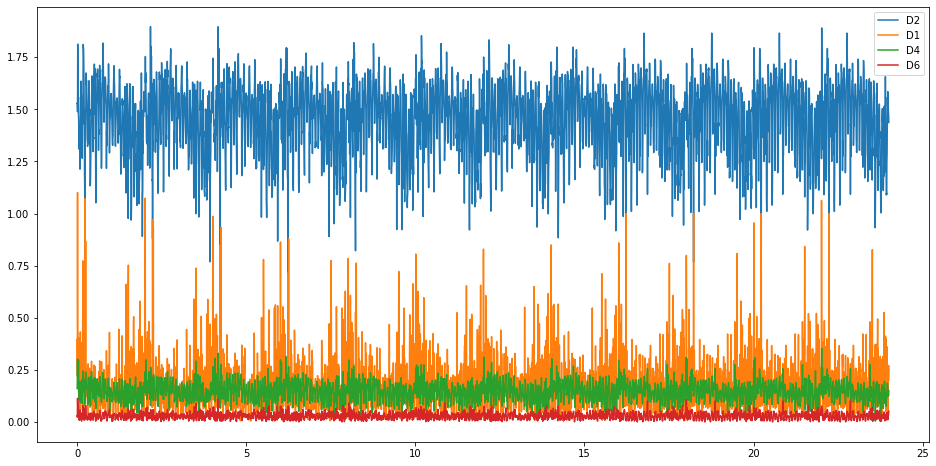

In [133]:
fig = plt.figure(figsize=(16,8))
xd2 = np.linspace(0,24,D1Amp.size)
plt.plot(xd2,D2Amp,label='D2')
plt.plot(xd2, D1Amp,label='D1')
plt.plot(xd2, D4Amp,label='D4')
plt.plot(xd2, D6Amp,label='D6')
plt.legend()
# plt.plot(xd2,totMean)
plt.show()

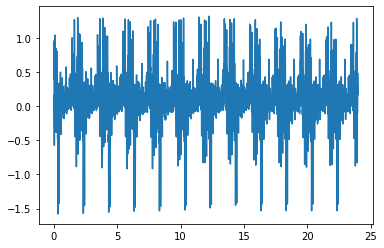

In [134]:
%matplotlib inline
plt.plot(xd2,totMean)
plt.show()